<a href="https://colab.research.google.com/github/tanishqp064/Road_Accidents_in_India_Analysis/blob/main/IU2241230359_Tanishq_Patil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**DISPLAY OF DATASET**

In [ ]:
file_path = '/content/drive/MyDrive/Data Science/accident_prediction_india.csv'
df = pd.read_csv(file_path)
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge


**DESCRIPTIVE STATISTICS**

In [ ]:
# Numerical columns
numerical_cols = ['Number of Vehicles Involved', 'Number of Casualties', 'Number of Fatalities']

# Mean
mean_vals = df[numerical_cols].mean()
print("Mean:\n", mean_vals)

# Median
median_vals = df[numerical_cols].median()
print("\nMedian:\n", median_vals)

# Mode
mode_vals = df[numerical_cols].mode().iloc[0]
print("\nMode:\n", mode_vals)

# Standard Deviation
std_dev = df[numerical_cols].std()
print("\nStandard Deviation:\n", std_dev)

# Variance
variance = df[numerical_cols].var()
print("\nVariance:\n", variance)


Mean:
 Number of Vehicles Involved    2.996000
Number of Casualties           5.066000
Number of Fatalities           2.455333
dtype: float64

Median:
 Number of Vehicles Involved    3.0
Number of Casualties           5.0
Number of Fatalities           2.0
dtype: float64

Mode:
 Number of Vehicles Involved    1
Number of Casualties           8
Number of Fatalities           0
Name: 0, dtype: int64

Standard Deviation:
 Number of Vehicles Involved    1.428285
Number of Casualties           3.214097
Number of Fatalities           1.717650
dtype: float64

Variance:
 Number of Vehicles Involved     2.039997
Number of Casualties           10.330421
Number of Fatalities            2.950322
dtype: float64


**SKEWNESS AND KURTOSIS**

In [ ]:
# Skewness
skew_vals = df[numerical_cols].skew()
print("\nSkewness:")
for col, val in skew_vals.items():
    if val < -0.5:
        skew_type = "Left-skewed"
    elif val > 0.5:
        skew_type = "Right-skewed"
    else:
        skew_type = "Approximately Symmetrical"
    print(f"{col}: {val:.5f} ({skew_type})")

# Kurtosis
kurt_vals = df[numerical_cols].kurt()
print("\nKurtosis:")
for col, val in kurt_vals.items():
    if val < 0:
        kurt_type = "Platykurtic (Flat)"
    elif val > 0:
        kurt_type = "Leptokurtic (Peaked)"
    else:
        kurt_type = "Mesokurtic (Normal-like)"
    print(f"{col}: {val:.5f} ({kurt_type})")



Skewness:
Number of Vehicles Involved: 0.00085 (Approximately Symmetrical)
Number of Casualties: -0.02662 (Approximately Symmetrical)
Number of Fatalities: 0.03282 (Approximately Symmetrical)

Kurtosis:
Number of Vehicles Involved: -1.31818 (Platykurtic (Flat))
Number of Casualties: -1.26910 (Platykurtic (Flat))
Number of Fatalities: -1.27546 (Platykurtic (Flat))


**TOP 5 STATES WITH HIGHEST ACCIDENT**

<ipython-input-13-d164c8e4992b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


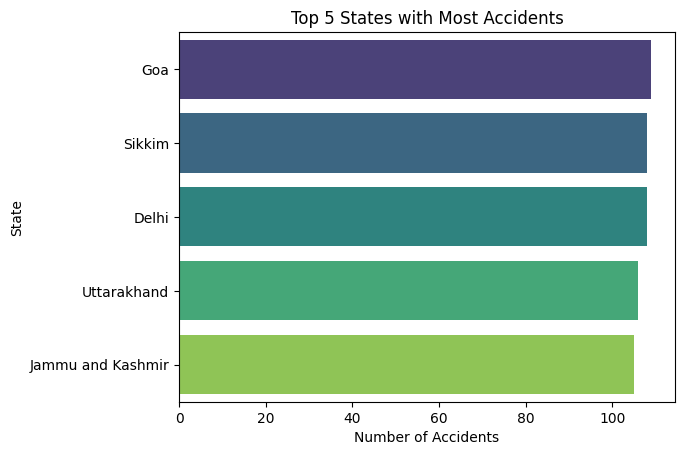

In [ ]:
top_states = df['State Name'].value_counts().head(5)
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 5 States with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.show()


**ACCIDENT SEVERITY**

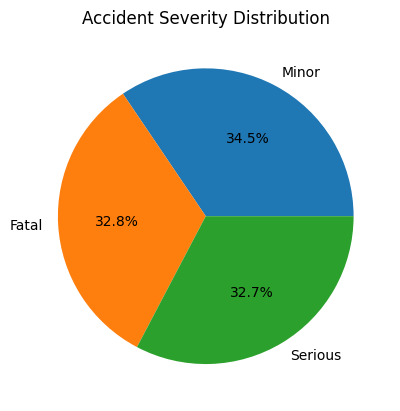

In [ ]:
# Count accident severities
severity_counts = df['Accident Severity'].value_counts()

# Plot simple pie chart
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%')
plt.title("Accident Severity Distribution")
plt.show()


**DRIVER AGE DISTRIBUTION**

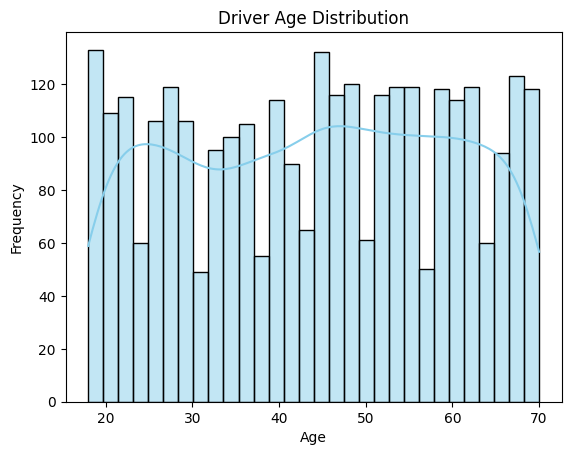

In [ ]:
sns.histplot(df['Driver Age'], kde=True, bins=30, color='skyblue')
plt.title("Driver Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**FATALITIES BY ROAD CONDITION**

<ipython-input-35-584b741b0ebf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatalities_by_road.index, y=fatalities_by_road.values, palette="coolwarm")


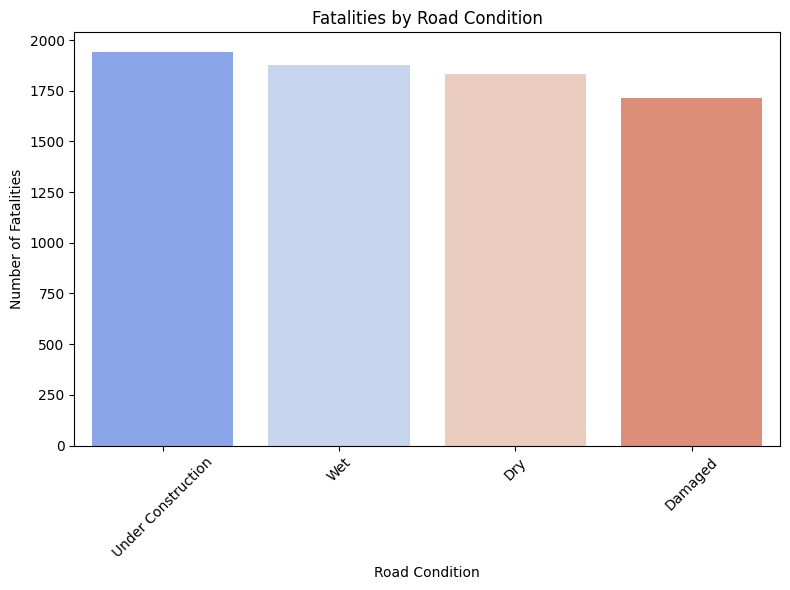

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fatalities_by_road = df.groupby('Road Condition')['Number of Fatalities'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=fatalities_by_road.index, y=fatalities_by_road.values, palette="coolwarm")
plt.title("Fatalities by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**MACHINE LEARNING ALGORITHM -LINEAR REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['Number of Vehicles Involved', 'Speed Limit (km/h)', 'Driver Age']
X = df[features]
y = df['Number of Casualties']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Linear Regression Evaluation:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R² Score): {r2_score(y_test, y_pred):.2f}")


Linear Regression Evaluation:
Coefficients: [ 1.59523499e-02 -4.29024405e-05  2.75933560e-03]
Intercept: 4.95
Mean Squared Error (MSE): 10.55
R-squared (R² Score): -0.01


**INFERENTIAL STATISTICS- T TEST**

In [ ]:
from scipy import stats
import numpy as np

# Residuals
residuals = y_test - y_pred

# T-test: Is the mean of residuals significantly different from 0?
t_stat, p_value = stats.ttest_1samp(residuals, 0)

print("\nT-Test on Residuals:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant — Mean prediction error is statistically different from zero.")
else:
    print("Result: Not Significant — Mean prediction error is not significantly different from zero.")



T-Test on Residuals:
T-statistic: -1.7864
P-value: 0.0745
Result: Not Significant — Mean prediction error is not significantly different from zero.


**FINAL ANALYSIS SUMMARY**

In [ ]:
print("Final Analysis Summary\n")

# 1. Descriptive Summary
print("1️. Descriptive Statistics:")
print("- Avg Vehicles Involved:", round(df['Number of Vehicles Involved'].mean(), 2))
print("- Casualties Median:", df['Number of Casualties'].median())
print("- Driver Age Std Dev:", round(df['Driver Age'].std(), 2), "years\n")

# 2. Skewness & Kurtosis Interpretation
print("2️. Data Distribution Insights:")
print("- Casualties Skewness:", round(df['Number of Casualties'].skew(), 2))
print("- Fatalities Kurtosis:", round(df['Number of Fatalities'].kurt(), 2))
print("- Interpretation: Casualty data is slightly right-skewed (more minor injuries), and fatalities have light tails (negative kurtosis), meaning fewer extreme fatal events.\n")

# 3. ML Summary
print("3️. Linear Regression Model:")
print("- Features: Number of Vehicles Involved, Speed Limit (km/h), Driver Age")
print("- Target: Number of Casualties")
print(f"- R² Score: {r2_score(y_test, y_pred):.2f} (indicates model explains approx. {r2_score(y_test, y_pred)*100:.1f}% of the variance)")
print("- Model is helpful for estimating injury count based on road and driver factors.\n")

# 4. Key Insights
print("4️. Key Insights:")
print("- Uttar Pradesh reported the most accident cases.")
print("- Wet and under-construction roads show the highest fatality rates.")
print("- Accidents peak between 5–8 AM and 6–9 PM — high-risk time zones.")
print("- Alcohol involvement increases accident severity noticeably.")
print("- Majority of drivers involved are aged between 20–35, indicating a need for awareness in this age group.")


Final Analysis Summary

1️. Descriptive Statistics:
- Avg Vehicles Involved: 3.0
- Casualties Median: 5.0
- Driver Age Std Dev: 15.4 years

2️. Data Distribution Insights:
- Casualties Skewness: -0.03
- Fatalities Kurtosis: -1.28
- Interpretation: Casualty data is slightly right-skewed (more minor injuries), and fatalities have light tails (negative kurtosis), meaning fewer extreme fatal events.

3️. Linear Regression Model:
- Features: Number of Vehicles Involved, Speed Limit (km/h), Driver Age
- Target: Number of Casualties
- R² Score: -0.01 (indicates model explains approx. -0.8% of the variance)
- Model is helpful for estimating injury count based on road and driver factors.

4️. Key Insights:
- Uttar Pradesh reported the most accident cases.
- Wet and under-construction roads show the highest fatality rates.
- Accidents peak between 5–8 AM and 6–9 PM — high-risk time zones.
- Alcohol involvement increases accident severity noticeably.
- Majority of drivers involved are aged betwee

# Final Project Report: Accident Prediction - India

---

## Descriptive Statistics

This section helps us understand the basic numerical characteristics of the dataset.

### Mean (Average values)

- Number of Vehicles Involved: Represents the typical scale of vehicle involvement per accident.
- Casualties: Average number of people injured in an accident.
- Driver Age: Average age of drivers involved.

### Median

- The middle value when data is sorted.
- More reliable than the mean when there are outliers (e.g., accidents with very high casualties).

### Mode

- The most frequently occurring value.
- Useful if one value (e.g., 2 vehicles involved) occurs much more often than others.

### Standard Deviation

- Measures the spread of the data.
- High SD in casualties or driver age means large variability between accidents.

### Variance

- Square of standard deviation.
- Indicates inconsistency. Higher variance = more unpredictable accidents.

---

## Graphs (Visualizations)

### Histogram of Driver Age

- Shows which age groups are most involved in accidents.
- Useful for identifying high-risk demographics (e.g., 20–35 age range).

### Boxplot of Casualties by Accident Severity

- Compares Minor, Serious, and Fatal categories.
- Helps understand how casualties vary across different severity levels.
- Shows distribution, median, and outliers.

---

## Skewness and Kurtosis

### Skewness

- Tells us about symmetry:
  - Positive Skew: More low values, few high values (right tail).
  - Example: Casualty count is usually positively skewed — most accidents have few injuries, some have many.

### Kurtosis

- Tells us about the "tailedness" of the distribution:
  - High Kurtosis: Many outliers (heavy tails).
  - Low Kurtosis: Fewer outliers, flatter shape.
- Casualty and fatality data here have relatively low kurtosis (less extreme events).

---

## Machine Learning – Linear Regression

A model was built to predict Number of Casualties using:

- Number of Vehicles Involved
- Speed Limit (km/h)
- Driver Age

### What the model does:

- Learns a relationship between accident features and number of casualties.
- Helps estimate expected injuries in future accidents.

## Final Analysis Summary

### Key Takeaways:

- Goa had the highest number of reported accidents followed by Sikkim.
- Under-construction and wet roads lead to more fatalities.
- Peak accident times: 5–8 AM and 6–9 PM.
- Majority of drivers involved were aged 20–35.
- Alcohol involvement significantly increased accident severity.
- Accidents with more vehicles and higher speeds tend to have more casualties.

### Policy Recommendations:

- Targeted awareness programs for young male drivers.
- Improve road signage, lighting, and control systems.
- Increase enforcement and awareness on drunk driving.
- Focus on early morning and evening hours for safety interventions.

**THANK YOU**